ML-Learn


In [1]:
import sys
import matplotlib as plt
import pandas as pd
import sklearn
import numpy as np


In [2]:
print("system:-",sys.version)
print("matplotlib :-",plt.__version__)
print("pandas :-",pd.__version__)
print("sklearn :-",sklearn.__version__)
print("numpy :-",np.__version__)

system:- 3.6.3 (v3.6.3:2c5fed8, Oct  3 2017, 17:26:49) [MSC v.1900 32 bit (Intel)]
matplotlib :- 3.3.4
pandas :- 1.1.5
sklearn :- 0.24.2
numpy :- 1.19.5


In [3]:
#importing data using pandas

data=pd.read_csv("C:/Users/Harshit/PycharmProjects/untitled/venv/Lib/site-packages/matplotlib/mpl-data/sample_data/msft.csv")
print(data.head())

        Date   Open   High    Low  Close    Volume  Adj. Close*
0  19-Sep-03  29.76  29.97  29.52  29.96  92433800        29.79
1  18-Sep-03  28.49  29.51  28.42  29.50  67268096        29.34
2  17-Sep-03  28.76  28.95  28.47  28.50  47221600        28.34
3  16-Sep-03  28.41  28.95  28.32  28.90  52060600        28.74
4  15-Sep-03  28.37  28.61  28.33  28.36  41432300        28.20


<Figure size 4320x4320 with 0 Axes>

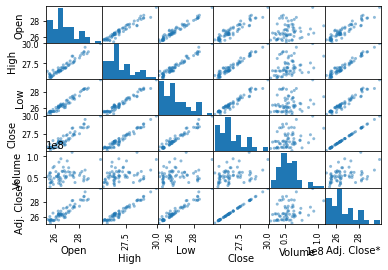

In [15]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(60,60))
scatter_matrix(data)
plt.show()

In [5]:
#taking features x and y
x=np.array(data["Open"]).reshape(-1,1)
y=np.array(data["Close"])
print(x.shape)

(65, 1)


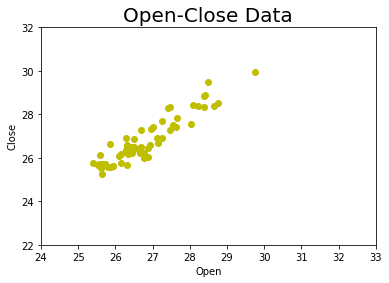

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color="y")
plt.title("Open-Close Data",fontsize=20)
plt.xlabel("Open")
plt.ylabel("Close")
plt.axis((24,33,22,32))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import KFold



In [8]:
def report(x_train,x_test,y_train,y_test):
    model=linear_model.LinearRegression()
    model.fit(x_train,y_train)
    y_p=model.predict(x_test)
    y_p=[int(i) for i in y_p]
    y_t=[int(i) for i in y_test]
    return accuracy_score(y_p,y_t)
    

In [9]:

kf=KFold(n_splits=3)
for i,j in kf.split(x):
    x_train,x_test,y_train,y_test=x[i],x[j],y[i],y[j]
    print("Accuracy :- {}".format(report(x_train,x_test,y_train,y_test)))
   

Accuracy :- 0.7272727272727273
Accuracy :- 0.8636363636363636
Accuracy :- 0.7142857142857143


In [10]:


model=linear_model.LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)



In [11]:
y_pre=[int(i) for i in y_predict]
y_act=[int(i) for i in y_test]
print("Accuracy :- {}".format(accuracy_score(y_pre,y_act)))
print(classification_report(y_pre,y_act))

Accuracy :- 0.7142857142857143
              precision    recall  f1-score   support

          25       0.83      0.83      0.83         6
          26       0.50      0.67      0.57         6
          27       0.86      0.67      0.75         9

    accuracy                           0.71        21
   macro avg       0.73      0.72      0.72        21
weighted avg       0.75      0.71      0.72        21



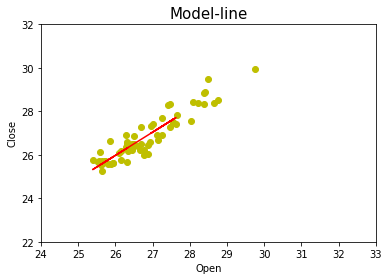

In [12]:
plt.plot(x_test,y_predict,color="r")
plt.scatter(x,y,color="y")
plt.title("Model-line",fontsize=15)
plt.xlabel("Open")
plt.ylabel("Close")
plt.axis((24,33,22,32))
plt.show()

In [13]:
check=float(input("Enter Open value:-"))
check=np.array(check)
pr=model.predict(np.array(check).reshape(-1, 1) )
print("Predicted value :- {}".format(pr))

Enter Open value:-24.5
Predicted value :- [24.37086949]


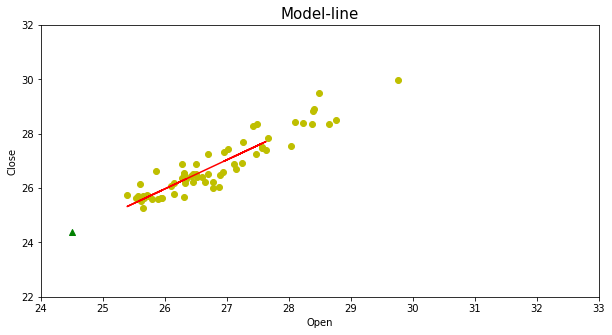

In [14]:
plt.figure(figsize=(10,5))
plt.plot(x_test,y_predict,color="r")

plt.scatter(x,y,color="y")
plt.scatter(check,pr,color="g",marker="^")

plt.title("Model-line",fontsize=15)

plt.xlabel("Open")

plt.ylabel("Close")

plt.axis((24,33,22,32))

plt.show()